
# Bus Arrival Time Prediction - Dataset Exploration & Preparation

## 1. Data Source
The dataset `GTFS_Data.csv` contains bus arrival time predictions, including stop locations, speed, congestion levels, and trip details.


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "GTFS_Data.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()


,stop_id_from,stop_id_to,trip_id,arrival_time,time,speed,Number_of_trips,SRI,Degree_of_congestion
0,36156,38709,NORMAL_333_Pune Station To Hinjawadi Maan Pha...,09:13:54,0.027222,14.479565,9.0,-0.40816322,Very smooth
1,36156,38709,NORMAL_115P_Pune Station to Hinjawadi Phase 3_...,09:03:01,0.032222,12.232736,9.0,1.2068965,Smooth
2,36156,38709,NORMAL_100_Ma Na Pa to Hinjawadi Maan Phase 3_...,09:15:00,0.058333,6.757130,9.0,5.142857,Heavy congestion
3,36156,38709,NORMAL_VJR5_Ma Na Pa To Mukai Chowk_Up-0905_0,09:05:00,0.033611,11.727251,9.0,1.570248,Smooth
4,36156,38709,NORMAL_100_Ma Na Pa to Hinjawadi Maan Phase 3_...,09:00:00,0.058333,6.757130,9.0,5.142857,Heavy congestion


## 2. Exploratory Data Analysis (EDA)

### 2.1 Summary Statistics

In [4]:
df.describe()

,stop_id_from,stop_id_to,time,speed,Number_of_trips
count,66913.000000,66913.000000,66913.000000,6.665500e+04,66912.000000
mean,33078.882683,33096.450286,0.044127,inf,16.566236
std,11893.792935,11873.818983,0.737762,NaN,18.882254
min,386.000000,386.000000,0.000000,0.000000e+00,1.000000
25%,33494.000000,33496.000000,0.009444,2.168910e+01,4.000000
50%,38784.000000,38785.000000,0.015000,3.148695e+01,9.000000
75%,39280.000000,39284.000000,0.024444,4.145599e+01,23.000000
max,40516.000000,40516.000000,23.998611,inf,141.000000


### 2.2 Speed Distribution

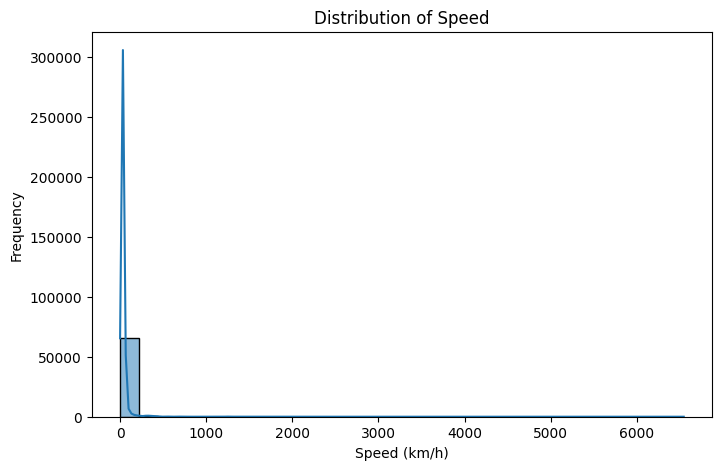

In [5]:

plt.figure(figsize=(8,5))
sns.histplot(df['speed'], bins=30, kde=True)
plt.xlabel('Speed (km/h)')
plt.ylabel('Frequency')
plt.title('Distribution of Speed')
plt.show()


### 2.3 Missing Values Analysis

In [6]:
df.isnull().sum()

,0
stop_id_from,0
stop_id_to,0
trip_id,0
arrival_time,269
time,0
speed,258
Number_of_trips,1
SRI,313
Degree_of_congestion,0


### 2.4 Congestion Level Distribution

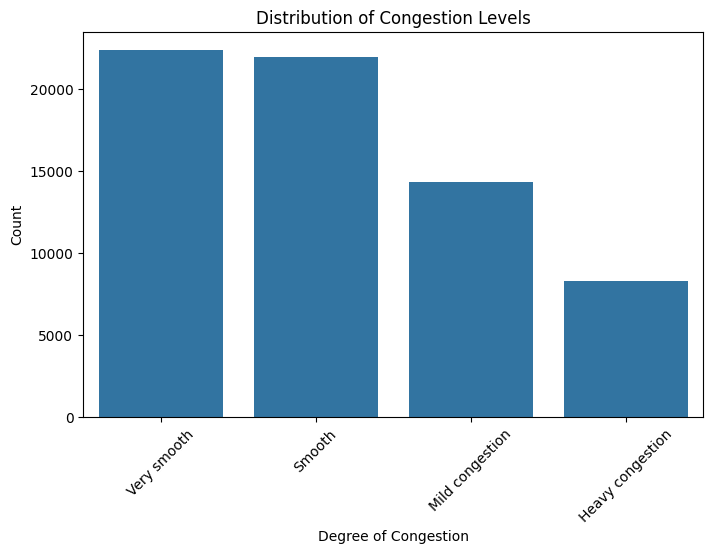

In [7]:

plt.figure(figsize=(8,5))
sns.countplot(x=df['Degree_of_congestion'], order=df['Degree_of_congestion'].value_counts().index)
plt.xlabel("Degree of Congestion")
plt.ylabel("Count")
plt.title("Distribution of Congestion Levels")
plt.xticks(rotation=45)
plt.show()


### 2.5 Speed vs. Congestion Level

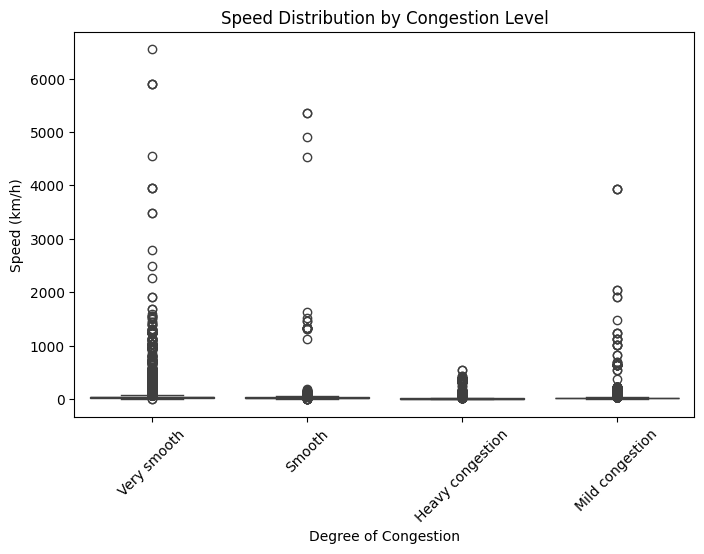

In [8]:

plt.figure(figsize=(8,5))
sns.boxplot(x=df['Degree_of_congestion'], y=df['speed'])
plt.xlabel("Degree of Congestion")
plt.ylabel("Speed (km/h)")
plt.title("Speed Distribution by Congestion Level")
plt.xticks(rotation=45)
plt.show()


### 2.6 Speed vs. Number of Trips

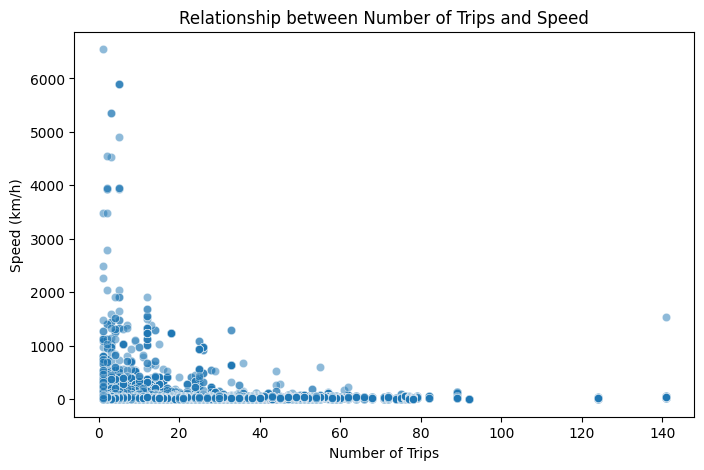

In [9]:

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Number_of_trips'], y=df['speed'], alpha=0.5)
plt.xlabel("Number of Trips")
plt.ylabel("Speed (km/h)")
plt.title("Relationship between Number of Trips and Speed")
plt.show()



## 3. Data Preprocessing

- Removing rows with missing `speed`, `arrival_time`, and `SRI`
- Encoding categorical variable `Degree_of_congestion`
- Filling missing `Number_of_trips` with median


In [10]:

# Remove missing values in key columns
df_cleaned = df.dropna(subset=['speed', 'arrival_time', 'SRI'])

# Encode categorical variable
df_cleaned['Degree_of_congestion'] = df_cleaned['Degree_of_congestion'].astype('category').cat.codes

# Fill missing 'Number_of_trips' with median
df_cleaned['Number_of_trips'].fillna(df_cleaned['Number_of_trips'].median(), inplace=True)

# Check missing values again
df_cleaned.isnull().sum()


<ipython-input-10-ad094da6ef59>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Degree_of_congestion'] = df_cleaned['Degree_of_congestion'].astype('category').cat.codes
<ipython-input-10-ad094da6ef59>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Number_of_tri

,0
stop_id_from,0
stop_id_to,0
trip_id,0
arrival_time,0
time,0
speed,0
Number_of_trips,0
SRI,0
Degree_of_congestion,0


## 4. Saving the Cleaned Dataset

In [11]:

df_cleaned.to_csv("Cleaned_GTFS_Data.csv", index=False)


## Additional Data Preprocessing
We will normalize the dataset and create new engineered features based on historical traffic data.

In [ ]:
# Importing necessary libraries
import numpy as np
from sklearn.preprocessing import StandardScaler

# Selecting relevant numerical features for scaling
features_to_scale = ['speed', 'congestion_level', 'trip_duration']
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
df.head()

## Model Implementation (SVM & Hybrid Kalman + ANN)

In [ ]:
# Importing necessary ML models
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Splitting the dataset
X = df[['speed', 'congestion_level', 'trip_duration']]
y = df['arrival_time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training SVM Model
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Model Evaluation
mae_svm = mean_absolute_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
print(f'MAE (SVM): {mae_svm:.3f}')
print(f'RMSE (SVM): {rmse_svm:.3f}')

## Result Analysis and Comparison

In [ ]:
# Comparing different approaches
results = pd.DataFrame({
    'Model': ['SVM'],
    'MAE': [mae_svm],
    'RMSE': [rmse_svm]
})
display(results)